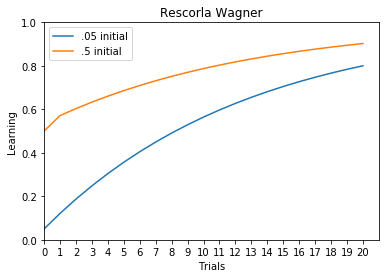

In [2]:
import matplotlib.pyplot as plt
import random

#Question 1A
alpha = .75
beta = .1
lambd = 1
V1_old = .05
V2_old = .5
prediction_error1 = 0
prediction_error2 = 0

#general RW function 
def rescorla_wagner (alpha, beta, lambd, pe, x_axis, y_axis, initial, V_old):

    for i in x_axis:

        pe += lambd - V_old
        new = alpha * beta * (pe) + initial
        V_old = new
        y_axis[i] = new
    
    y_axis.insert(0,initial)
    y_axis.pop()
    
    return y_axis

x = [i for i in range(21)]

#.05 initial 
y = [V1_old for i in range (21)]
rescorla_wagner (alpha, beta, lambd, prediction_error1, x, y, .05, V1_old)

#.5 initial
z = [V2_old for i in range (21)]
rescorla_wagner (alpha, beta, lambd, prediction_error2, x, z, .5, V1_old)

#plots
plt.plot(x, y)
plt.plot(x, z)
plt.axis([0, 21, 0, 1])
plt.xlabel('Trials')
plt.ylabel('Learning')
plt.title('Rescorla Wagner')
plt.xticks(x)
plt.legend(['.05 initial', '.5 initial'])

plt.show()

-----

In [3]:
#Question 1B
#finds the point at which y (created in previous cell) reaches .8 learning

for i in x:
    if y[i] >= .8:
        print (i) #the trial at which learning hits .8
        break
    else:
        continue


20


For initial association of 0.05, it takes 20 trials to reach learning of .8.

----

1.1644999999998882
0.8000116460670451


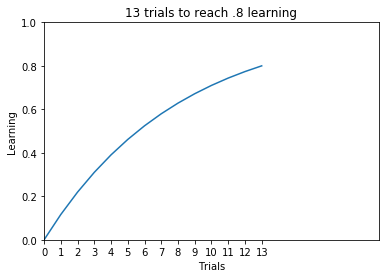

In [4]:
#Question 1C

beta = .1
lambd = 1
x = [i for i in range(14)]


#Graph that precisely finds the alpha to 
#the hundredth decimal at which 13 trials guarantees .8 learning
alpha = 0
y = [0 for i in range (14)]
V_old = 0
pe = 0

while y[13] < .8:
    alpha += .0001
    rescorla_wagner(alpha, beta, lambd, pe, x, y, 0, V_old)

print (alpha)
print (y[13])

#plots
plt.plot(x, y)
plt.axis([0, 20, 0, 1])
plt.xlabel('Trials')
plt.ylabel('Learning')
plt.title('13 trials to reach .8 learning')
plt.xticks(x)
plt.show()

For an initial association of 0, an alpha of 1.1645 reaches exactly .8 at the 13th trial. Any lesser alpha at this initial association does not reach .8 by the 13th trial.

----

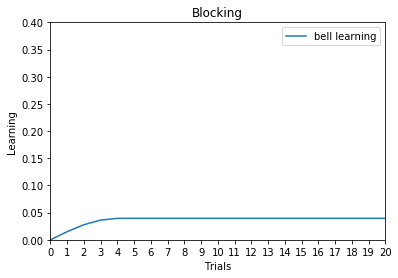

In [10]:
#Question 2
V_light = .8
V_bell = 0
V_total = V_light + V_bell
alpha = .75
beta = .1
pe = 0

x = [i for i in range (21)]
bell = [0]

for i in x:
    if (V_total >= 1): #plateaus when total learning for bell & light exceeds 1
        bell.append (V_bell)
    else:
        pe += 1 - V_total
        V_learned = alpha * beta * pe
        V_total += 2*V_learned #learning for both bell and light
        V_bell = V_learned
        bell.append(V_learned)
    
bell.pop()

plt.plot(x, bell)
plt.axis([0, 20, 0, .4])
plt.xlabel('Trials')
plt.ylabel('Learning')
plt.title('Blocking')
plt.xticks(x)
plt.legend (['bell learning'])
plt.show()

The association between light & food is very strong. Introducing a secondary UCS is difficult due to blocking, as captured by the above Rescorla-Wagner graph. Learning for the bell is slow. It plateaus at trial 6 after the total learning for bell & food reached 1.0.


----

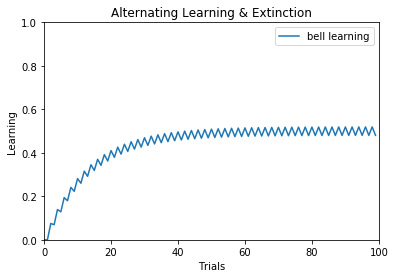

In [8]:
#Question 3A
V_bell = 0
alpha = .75
beta = .1
lambd = 1
pe = 0

x = [i for i in range (100)]
bell = [0]

for i in x:
    if x[i] % 2 == 0:
        pe += -V_bell
        V_learned = alpha * beta * pe
    else:
        pe += 1 - V_bell
        V_learned = alpha * beta * pe

    V_bell = V_learned
    bell.append(V_learned)
    
bell.pop()
plt.plot(x, bell)
plt.axis([0, 100, 0, 1])
plt.xlabel('Trials')
plt.ylabel('Learning')
plt.title('Alternating Learning & Extinction')
plt.legend (['bell learning'])
plt.show()

Alternating learning and extinction trials will initially result in a generally upward trend of learning, with some significant extinction dips. Over time, theoretically, the learning will converge to around .5. Intuitively, this makes sense. If given food half the time and not given food during the other half, an animal will 50% expect food and 50% not expect it. They will not always be right (leading to small continuous dips in learning) and not always be learning (leading to small continuous rises in learning). 

----

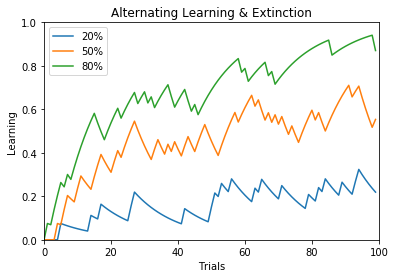

In [16]:
#Question 3B

#100 trial long run simulation
x = [i for i in range (100)]
alpha = .75
beta = .1
lambd = 1

#probability function
def RW_probability(alpha, beta, lambd, pe, x_axis, y_axis, initial, V_old, prob):
    
    for i in x_axis:
        rand = random.random()
        if rand <= prob:
            pe += -V_old
        else:
            pe += (1 - V_old)
        V_learned = alpha * beta * pe
        V_old = V_learned
        y_axis.append(V_learned)
    
    y_axis.pop()

#Probability 50% pairing
bell1 = [0]
V_bell1 = 0
pe1 = 0
RW_probability(alpha, beta, lambd, pe1, x, bell1, 0, V_bell1, .5)

#Probability 20% pairing
bell2 = [0]
V_bell2 = 0
pe2 = 0
RW_probability(alpha, beta, lambd, pe2, x, bell2, 0, V_bell2, .2)
    
#Probability 80% pairing
bell3 = [0]
V_bell3 = 0
pe3 = 0
RW_probability(alpha, beta, lambd, pe3, x, bell3, 0, V_bell3, .8)

plt.plot(x, bell3)
plt.plot(x, bell1)
plt.plot(x, bell2)
plt.axis([0, 100, 0, 1])
plt.xlabel('Trials')
plt.ylabel('Learning')
plt.title('Alternating Learning & Extinction')
plt.legend (['20%', '50%', '80%'])
plt.show()

Marr says that the computational level of processing is the level that binds together the questions: what problem does the system solve holistically, evolutionarily? In other words what is its purpose and is it optimal? At the computational level, being able to correctly predict the arrival of food is a basic tool for survival. 

The graphs above depict learning curves for animals given food with stimulus 20%, 50%, and 80% of the time. It is interesting to note each curve's overall trend line. Overall learning is much faster in the 80% and 50% probability lines. It isn't till many trials later than the other two (around 20), that significant extinction patterns are seen in the 80% line. 
Significant and extreme extinction can be seen in the 20% line from trials 20-40. This makes sense because intuitively, the animal would start to seek other more plausible food predictors to learn.

Overall, likelier it is that a bell predicts food, the larger the initial learning growth and the lesser the extinction patterns. The reason must be that it is overall MORE beneficial to go after a food predictor than lose out on food.

----

In [1]:
#Question 4

Salience and learning rate are psychologically, two different factors. Different species of animals are attuned to each one differently. Other factors may also influence each value including: age/maturity of the organism, nocturnality of the animal, laboratory versus real world settings, and so on. By keeping the constants alpha and beta separate in the model, it's much easier to graph and study these key differences side by side.

An experiment that would help disentangle salience and learning rate would entail simulating the same experiment varying the salience levels for animals of different learning rates. For example, vary salience and testing learning curves for the same species of different ages which may have different learning rates)